#### import some essential libraries


In [10]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
import pylab #control fig size
pylab.rcParams ['figure.figsize']=[10.,8.]
%matplotlib inline

In [11]:
!pip install opencv-python

#### Read Image

In [12]:
input_image =cv2.imread('R.png')

### Image Size

In [13]:
print(input_image.size) #num of bytes

786432


### Image shape

In [14]:
print(input_image.shape)

(512, 512, 3)


512 * 512 * 3 = 786432
kol pixel el size bta3ha byte 

### image dtype

In [15]:
print(input_image.dtype)

uint8


#### plot the image

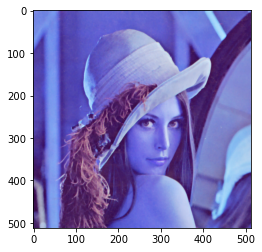

In [16]:
plt.imshow(input_image)

#### open CV sh8al BGR mesh RGB 3shan keda hia el colors mo5tlfa

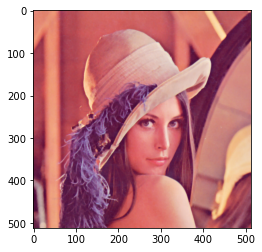

In [17]:
colored = cv2.cvtColor (input_image , cv2.COLOR_BGR2RGB)
plt.imshow(colored)

### another way to fix the colors 

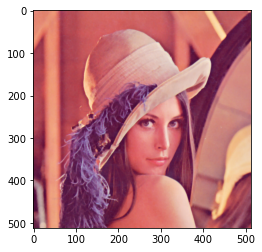

In [18]:
b , g , r = cv2.split(input_image)
fixed_lenna = cv2.merge ((r,g,b))
plt.imshow(fixed_lenna)

### plot a signal channel

In [19]:
b , g , r = cv2.split(input_image)

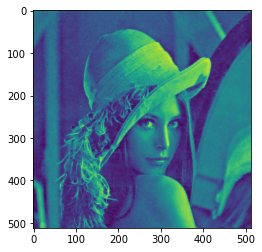

In [20]:
plt.imshow(b)

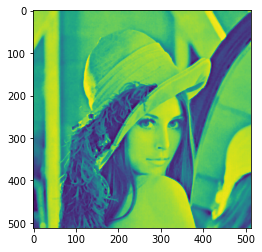

In [21]:
plt.imshow(r)

### convert to gray scale 

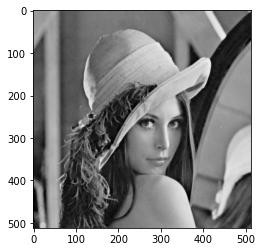

In [22]:
gray = cv2.cvtColor (input_image , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap="gray")

#( R channel * num )+ (G channel * num2) +( Bchannel * num3 )

el HSV space hwa en badl el three colors bykon 3ndi el sora 
based on Hue , Saturation , value

## Get lenna's face

In [23]:
type(input_image)

numpy.ndarray

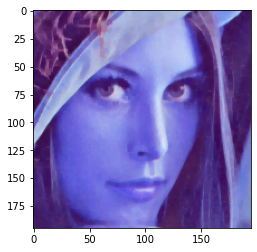

In [24]:
# hn3ml accessing 3ala numpy array 
lennas_face = input_image[195:390 , 200:395]
plt.imshow(lennas_face)

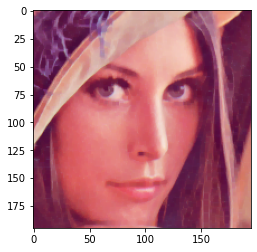

In [25]:
lennas_face = fixed_lenna[195:390 , 200:395] #[height , width]
plt.imshow(lennas_face)

### Vertical Flip

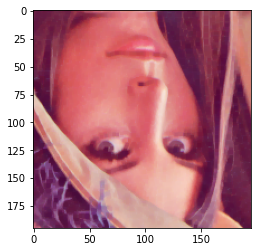

In [26]:
vertflipp = cv2.flip(lennas_face, 0) #el hwa raqm el index [height, width]
plt.imshow(vertflipp)

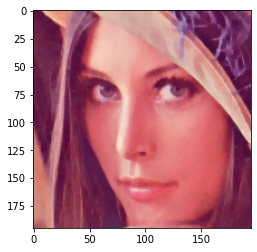

In [27]:
horiflipp = cv2.flip(lennas_face, 1) #el hwa raqm el index [height, width]
plt.imshow(horiflipp)

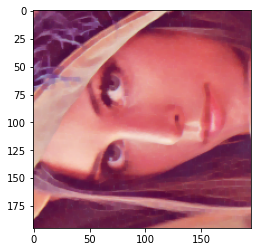

In [28]:
transposed = cv2.transpose(lennas_face)
plt.imshow(transposed)

### Noise Reduction & Blurring

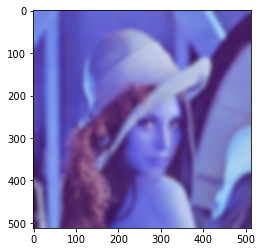

In [29]:
k = 31 #should be an odd num da hwa el size bta3 el filter
img_blurred = cv2.GaussianBlur(input_image, (k,k) ,-1)
plt.imshow(img_blurred)



In [30]:
#lma bnshel el noize bnday3 info kteer mn el sora

### linear filters :
    1- convolution 
    2-correlation
   

### 1-convolution 
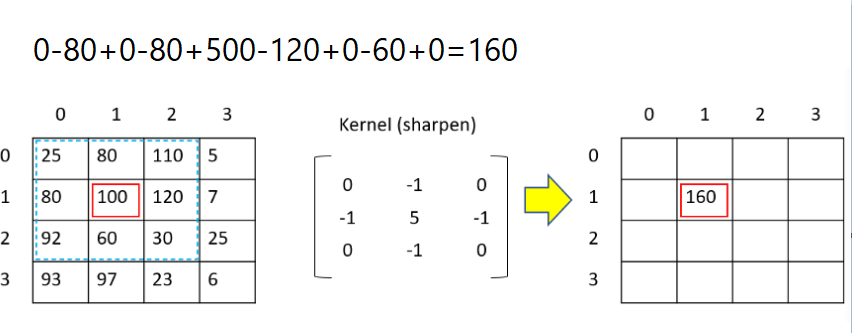

#### let's try some of effects of this filter 

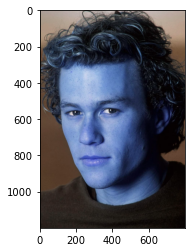

In [31]:
imagek =cv2.imread('heath.jfif')
plt.imshow(imagek)

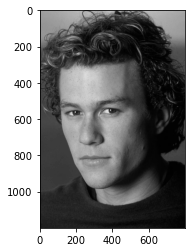

In [32]:
gray = cv2.cvtColor(imagek, cv2.COLOR_BGR2GRAY)  # first convert the color to gray
plt.imshow(gray ,cmap= "gray")

## Laplacian

*localizes edges better            
<nl> *less computational expensive</nl> 

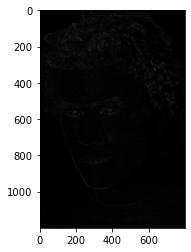

In [33]:
#laplacian = np.array (([1,1,1],[1,-8,1],[1,1,1]) ,dtype="int")
laplacian = np.array (([0,1,0],[1,-4,1],[0,1,0]) ,dtype="int")
#sums up to zero 

laplacian_imagek = cv2.filter2D(gray, -1,laplacian)

plt.imshow(laplacian_imagek , cmap = "gray" )

## Mean blur

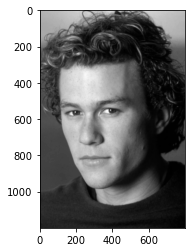

In [38]:
meanBlur = np.ones ((5,5) , dtype = "float") * (0.5/11)
mean_blur_heath = cv2.filter2D(gray, -2 ,meanBlur )
plt.imshow(mean_blur_heath, cmap = "gray")

## sharpen

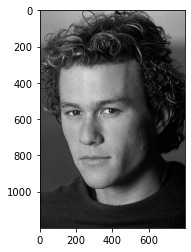

In [39]:
sharpen = np.array (([0,-1,0],[-2,7,-2],[0,-1,0]), dtype ="int")
#lazem y sum up l zero (-2-4+7)
sharpened_heath = cv2.filter2D(gray , -1 , sharpen) 
plt.imshow (sharpened_heath , cmap = "gray")

## Sobel Filters
##### Sobel filters are a great way of detecting edges in an image.

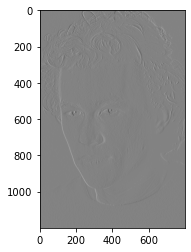

In [40]:
sobel_Horizontal1 = cv2.Sobel (gray , cv2.CV_64F ,1 ,0,ksize = 3) 
plt.imshow(sobel_Horizontal1 , cmap ="gray")

### K controls the clarity of edges and it has to be odd num
#####  next example with bigger K 

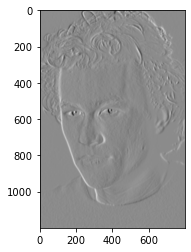

In [41]:
sobel_Horizontal = cv2.Sobel (gray , cv2.CV_64F ,1 ,0,ksize = 31) 
plt.imshow(sobel_Horizontal , cmap ="gray")

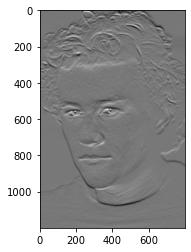

In [42]:
sobel_vertical = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=31)
plt.imshow(sobel_vertical , cmap = "gray")

### 2-correlation (linear operator)

<font color ="purple">**1- the process of moving a filter mask often referred to as kernel over the image and computing the sum of products at each location** </font>

2- b flip el x-axies w el y-axies 
el "1" y3ni hdrab kol element fl matrix fe one 
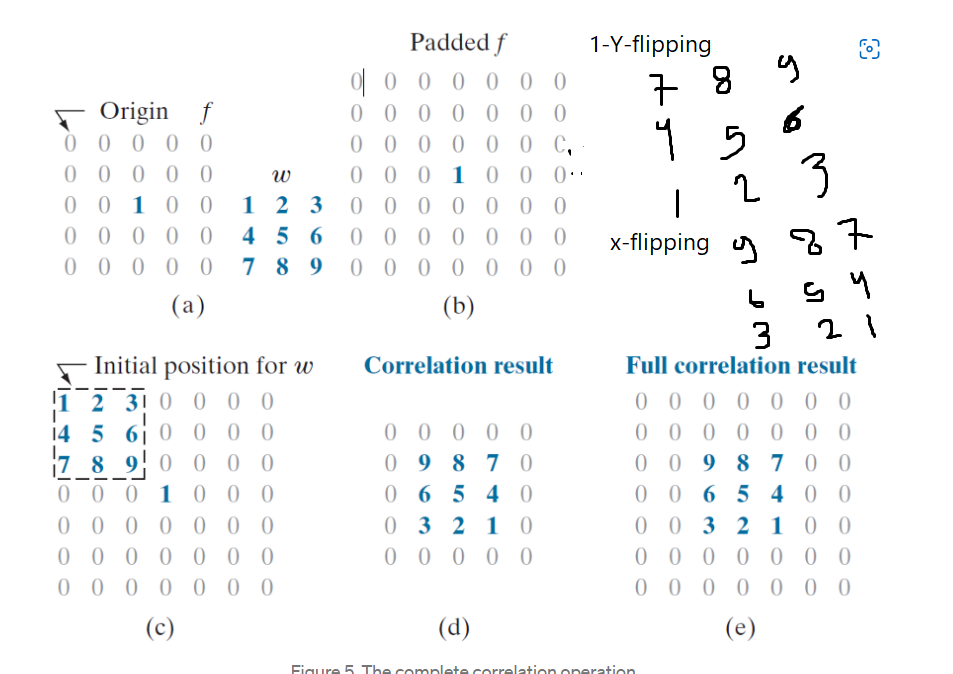


##### y3ni eh Padding ? --> y2ni b consider kol "0" fl origin 3ebara 3n center of 3* 3 matrix w bkmel el Zeros el na2sa   


### Sharpening Filters :- 
<ol><font color = green>
    
  
<li>
Low -pass Filter</li>
 <li>High-pass Filter </li>
 <li>Band-pass Filter</li>
</font></ol>

### Smoothing Filters :- 
<ol><font color = green>
    
  <li> Mean Filter </li>
<li>Gaussian Filter</li>
 <li>Median Filter </li>
 <li>Minimum Filter</li>
 <li>Maximum Filter</li>
 <li>Bilateral Filter </li></font></ol>



##### 1- median filter "non linear digital filtering"
     1-replace each pixel by the median in a neighborhood aroud the pixel 

     2-size of neighborhood controls the amount of smoothing 
  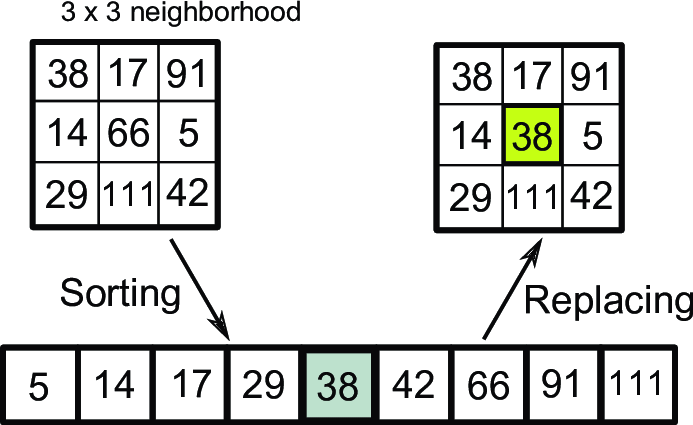


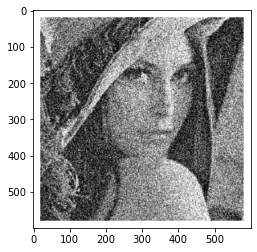

In [43]:
noisy_lenna = cv2.imread ('R (1).png')
plt.imshow(noisy_lenna)

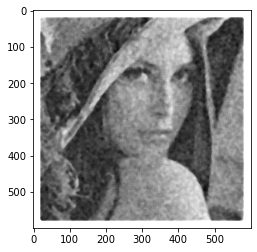

In [44]:
median_filter = cv2.medianBlur(noisy_lenna ,9)
# kol ma el scale da by increase htkon smooth akter bs el details "edges & corners" hkon hazy akter 
plt.imshow(median_filter)


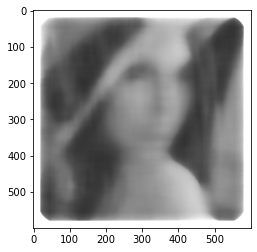

In [45]:
median_filter = cv2.medianBlur(noisy_lenna ,51)
# kol ma el scale da by increase htkon smooth akter bs el details "edges & corners" hkon hazy akter 
plt.imshow(median_filter)

#with 51 we've overcame the noise "white and black dots " bs we lost el edges & information of the image

## High Boost Filtering
### 1- subtract smoothed image "guassian smoothing for example" from the original one "so you will get the edges"
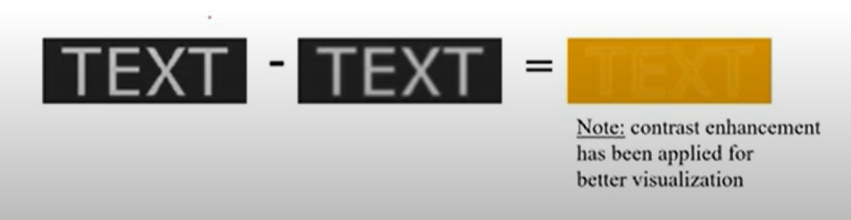









### 2- add the edges image "resultant image from the subtraction" to the original image 

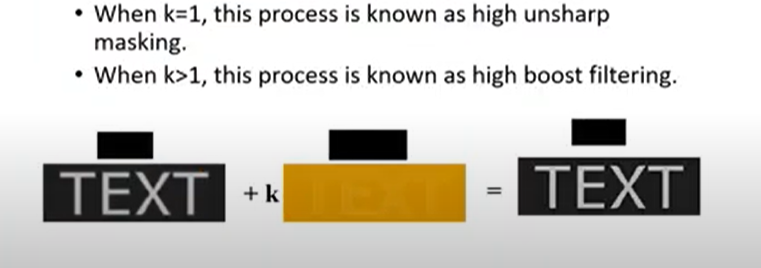


## <font color = purple> Intensity Transformation Operations </font>

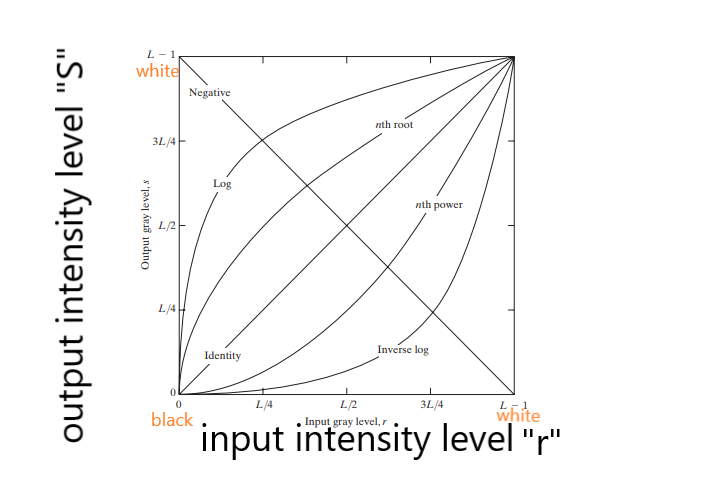

some basic transformations 
<ol><li>linear [Negative & identity]</li>
<li>logarithmic[log & inverse log]</li>
<li>power-law[nth root & nth root]</li></ol>

### 1-Image Negative
<font color = green size ="4"> - formula : S = L- 1 - r </font>
- intensity level [0 ---> L-1]
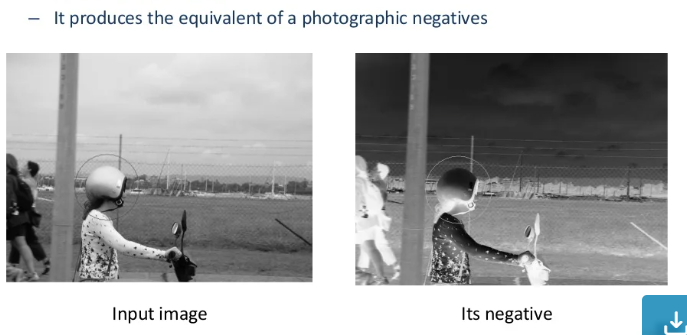

1541736


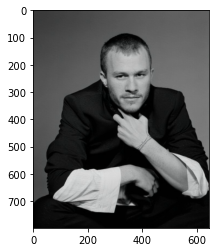

In [62]:
## Code time 

imgExam = cv2.imread('R(7).png' )
print(imgExam.size)
plt.imshow(imgExam)


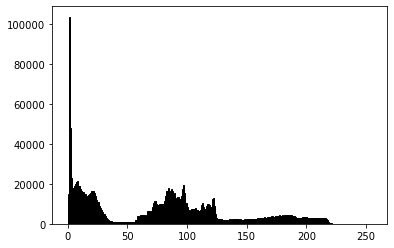

In [73]:
#histogram
plt.hist(imgExam.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k') 
plt.show()

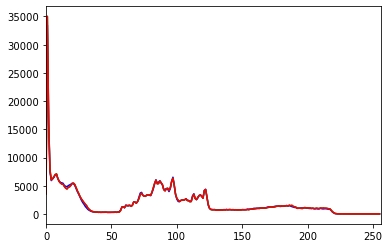

In [64]:
#histogram using another approach 
color = ('b', 'g','r')
for i, col in enumerate(color):
    histo = cv2.calcHist ([imgExam],[i],None,[256],[0,256])
    plt.plot (histo , color = col)
    plt.xlim([0, 256])
      
plt.show()

### Negate the picture and get histogram 

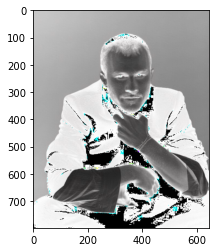

In [66]:
imgExamNeg = 1-imgExam
plt.imshow(imgExamNeg)

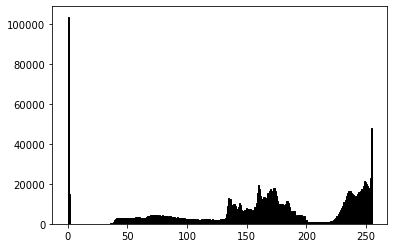

In [74]:
plt.hist(imgExamNeg.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k') 
plt.show()

## 2-Log Transformations

<font color = green size ="4"> Formula S = C log (1+r) ---> c : contrast , r > = 0 "because log(0)= infinity"</font>

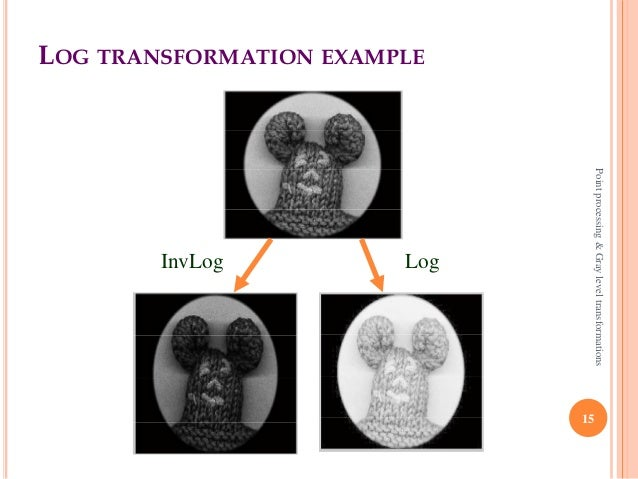

with log we get wider output pixels value
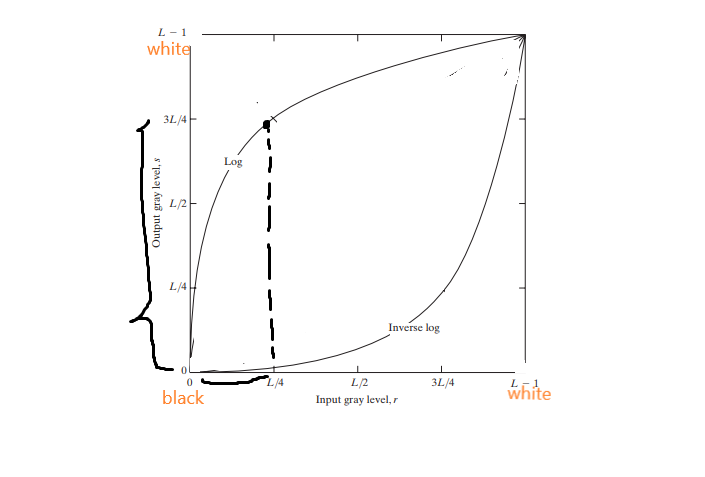


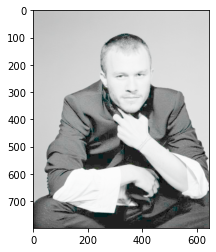

In [80]:
#max is the maximum pixel value in the image 
c = 255/(np.log(1+np.max(imgExam))) 
log_transformation = c*np.log(1+imgExam)
# Specify the data type without it you will get this error (ValueError: Unsupported dtype)
log_transformation = np.array(log_transformation, dtype = np.uint8)
plt.imshow(log_transformation)

## Power-Law (Gamma) Transformation
<font color = green size ="4">formula :  s = cr^ gamma</font> 
<ul><li> gamma > 1 ---> nth power
</li><li> gamma <1 ---> nth root
</li>
</ul>

<font Bold size ="3">Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings</font>

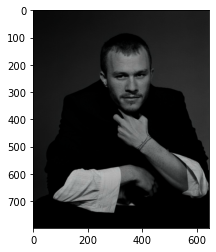

In [85]:
for gamma in [2.2]:
    # Apply gama correction.
    gamma_corrected = np.array(255*(imgExam / 255) ** gamma, dtype = 'uint8')
plt.imshow(gamma_corrected)

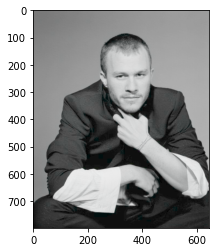

In [86]:
for gamma in [0.5]:
    # Apply gama correction.
    gamma_corrected = np.array(255*(imgExam / 255) ** gamma, dtype = 'uint8')
plt.imshow(gamma_corrected)

## histogram processing

#### contrsat :- Scale of difference between black and white
####  brightness of the image :- is defined by the intensity of light which is emitted by a particular light source.

### histogram processing :- graphical representation of a digital image.
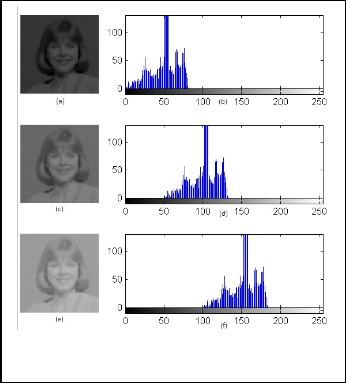

#### histogram techniques :
<ol><li> Histogram Sliding </li>
<li>Histogram stretching </li>
<li>Histogram Equalization </li></ol>

1- Hisrogram Sliding : the complete histogram is shifted towards rightwards or leftwards,changes are seen in the **brightness** of the image





2- Histogram Stretching : **contrast** of an image is increased.
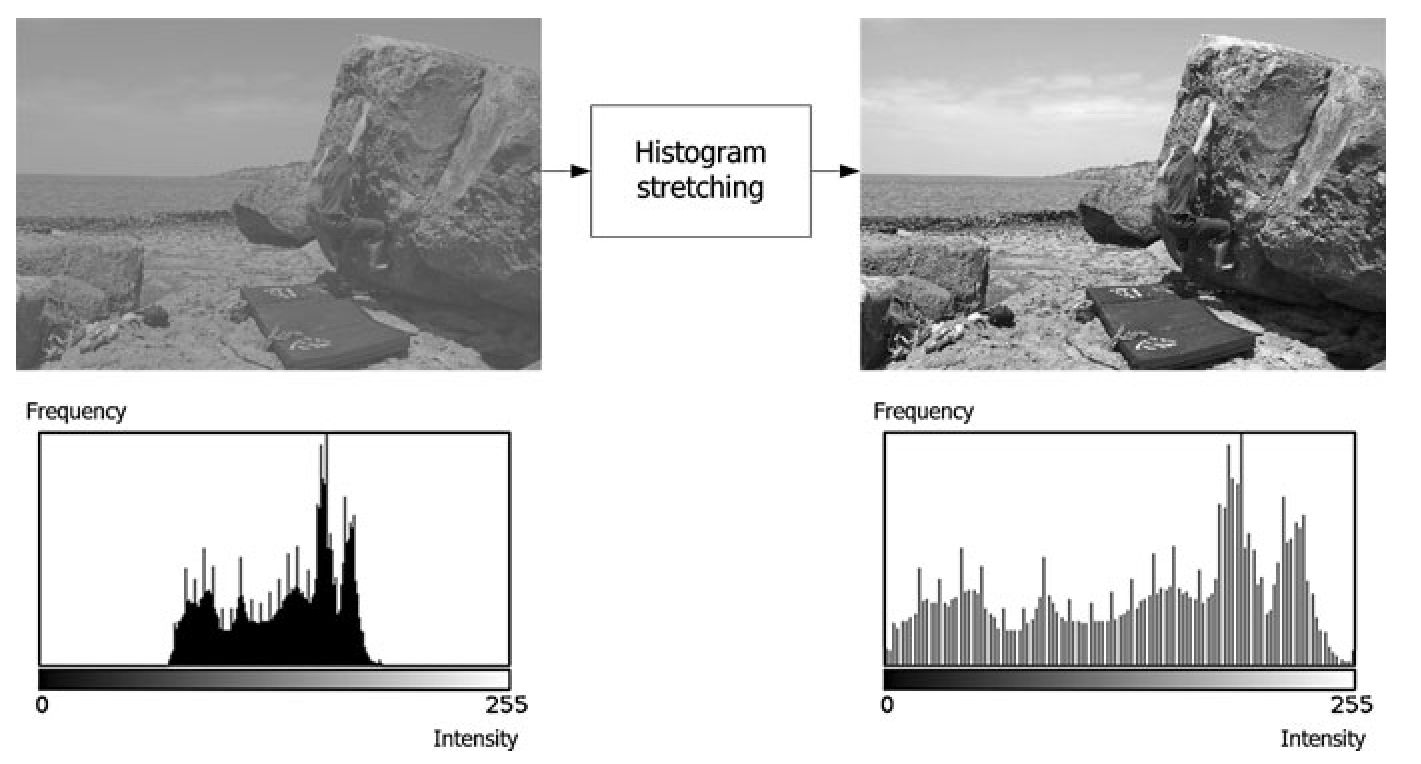


#### Histogram Equalization:used for equalizing all the pixel values of an image.
While stretching histogram, the shape of histogram remains the same whereas in Histogram equalization, the shape of histogram changes and it generates only one image.

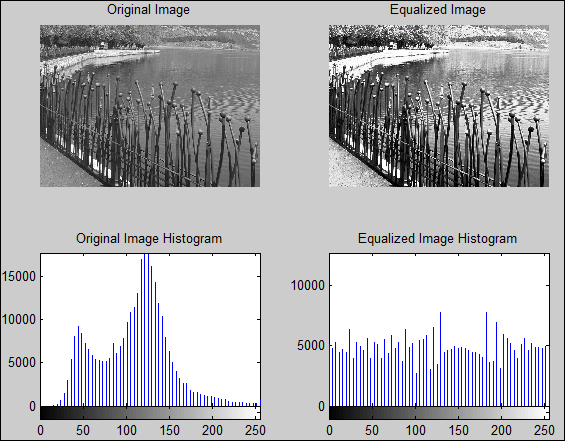

